# Retail Case Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

## Importing Data

In [2]:
customers = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/3. Python Foundation Case Studies/Case Study 1 - Retail Case Study/Customer.csv')

prod_cat = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/3. Python Foundation Case Studies/Case Study 1 - Retail Case Study/prod_cat_info.csv')

transactions = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/3. Python Foundation Case Studies/Case Study 1 - Retail Case Study/Transactions.csv')

### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [3]:
cust_tran = pd.merge(left = customers, right = transactions, how = 'inner',left_on='customer_Id',right_on='cust_id')

In [4]:
Customer_Final = pd.merge(left = cust_tran, right = prod_cat, how = 'inner',left_on=['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code'])

**Droping Duplicate/Repeating variables**

In [5]:
Customer_Final.drop(columns=['cust_id','prod_sub_cat_code'],axis=1,inplace=True)

In [6]:
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction


**Changing Dtypes**

In [7]:
Customer_Final.DOB = pd.to_datetime(Customer_Final.DOB)

In [8]:
Customer_Final.tran_date = pd.to_datetime(Customer_Final.tran_date)

### 2. Prepare a summary report for the merged data set.

 **a. Get the column names and their corresponding data types**

In [9]:
Customer_Final.dtypes

customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
transaction_id               int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
dtype: object

 **b. Top/Bottom 10 observations**

In [10]:
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,1970-01-22,F,8.0,87174343938,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
5,274630,1970-01-02,M,4.0,78357345891,2012-11-04,7,5,1,646,67.830,713.830,TeleShop,Books,Fiction
6,273541,1970-01-02,M,4.0,23916816961,2013-09-02,7,5,4,410,172.200,1812.200,e-Shop,Books,Fiction
7,269008,1970-02-13,F,6.0,35560569829,2013-09-03,7,5,1,1441,151.305,1592.305,e-Shop,Books,Fiction
8,269008,1970-02-13,F,6.0,94033312891,2012-04-26,7,5,5,746,391.650,4121.650,MBR,Books,Fiction
9,267199,1970-02-14,NaN,2.0,56749259881,2012-11-01,7,5,4,1049,440.580,4636.580,MBR,Books,Fiction


In [11]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23043,268914,1992-11-15,F,3.0,1407823655,2011-10-06,10,5,1,1252,131.460,1383.460,MBR,Books,Non-Fiction
23044,269519,1992-11-17,M,9.0,29719500605,2013-12-24,10,5,4,1036,435.120,4579.120,TeleShop,Books,Non-Fiction
23045,273524,1992-11-25,F,1.0,25762805863,2012-11-19,10,5,1,1401,147.105,1548.105,Flagship store,Books,Non-Fiction
23046,272141,1992-02-12,F,10.0,71337087467,2012-07-22,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,Non-Fiction
23047,272141,1992-02-12,F,10.0,71337087467,2012-07-16,10,5,3,1422,447.930,4713.930,e-Shop,Books,Non-Fiction
23048,267812,1992-04-12,F,1.0,63540378797,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,1992-09-12,F,7.0,71793203305,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,1992-12-15,F,7.0,91217108818,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction
23051,268097,1992-12-15,F,7.0,90114483354,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction
23052,268097,1992-12-15,F,7.0,90114483354,2011-01-26,10,5,4,1408,591.360,6223.360,e-Shop,Books,Non-Fiction


**c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)**

In [12]:
#round(Customer_Final.describe(),2).T.loc[:,['min','25%','75%','max']]

Five_number_summary  = pd.DataFrame()

Five_number_summary['Min'] = Customer_Final[Customer_Final.select_dtypes(include=['number']).columns].min()
Five_number_summary['Q1'] = Customer_Final[Customer_Final.select_dtypes(include=['number']).columns].quantile(0.25)
Five_number_summary['Median'] = Customer_Final[Customer_Final.select_dtypes(include=['number']).columns].median()
Five_number_summary['Q3'] = Customer_Final[Customer_Final.select_dtypes(include=['number']).columns].quantile(0.75)
Five_number_summary['Max'] = Customer_Final[Customer_Final.select_dtypes(include=['number']).columns].max()

Five_number_summary

,Min,Q1,Median,Q3,Max
customer_Id,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
city_code,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01
transaction_id,3268991.000,2.493864e+10,5.009313e+10,7.533000e+10,9.998755e+10
prod_subcat_code,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,1.000,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Qty,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,7.350,9.828000e+01,1.990800e+02,3.657150e+02,7.875000e+02
total_amt,-8270.925,7.624500e+02,1.754740e+03,3.569150e+03,8.287500e+03


**d. Frequency tables for all the categorical variables**

In [13]:
Customer_Final.loc[:,Customer_Final.dtypes=="object"].describe()

,Gender,Store_type,prod_cat,prod_subcat
count,23044,23053,23053,23053
unique,2,4,6,18
top,M,e-Shop,Books,Women
freq,11811,9311,6069,3048


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [14]:
counti_vars = Customer_Final.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]

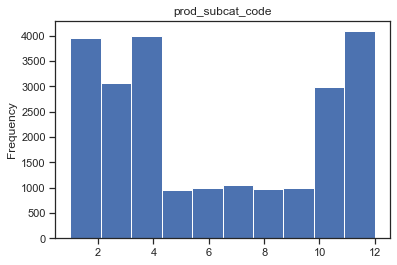

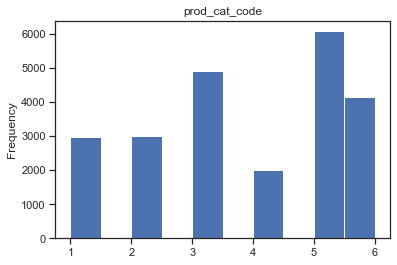

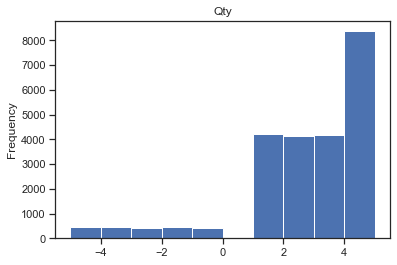

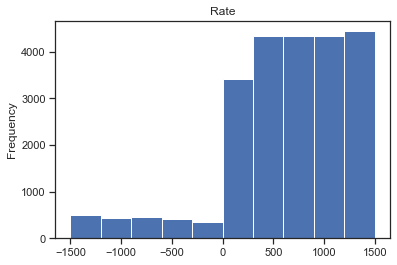

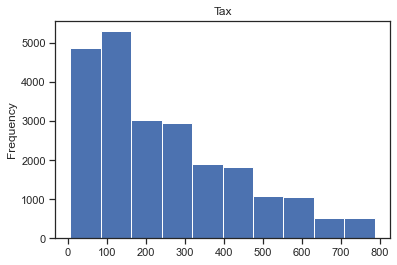

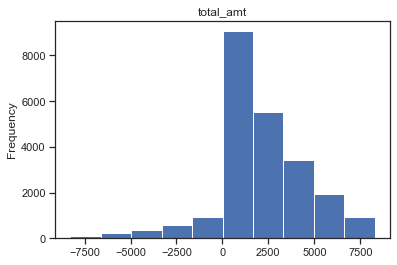

In [15]:
for var in counti_vars.columns:
    counti_vars[var].plot(kind='hist')
    plt.title(var)
    plt.show()

### 4. Calculate the following information using the merged dataset :

**a. Time period of the available transaction data**

In [16]:
# time_delta = (Customer_Final.tran_date.max()) - (Customer_Final.tran_date.min())
# total_second = time_delta.total_seconds()
# total_minutes = total_second/60
# total_hour = total_minutes/60

# print('First Datec :',Customer_Final.tran_date.min())
# print('Last Datec :',Customer_Final.tran_date.max())
# print('days :',time_delta.days, ', hours :',total_hour,', Minutes :',total_minutes,', Second :',total_second)

MinD = Customer_Final.tran_date.min()
MaxD = Customer_Final.tran_date.max()

print("Time period of the available transaction data is from "+ pd.Timestamp.strftime(MinD,format="%d-%m-%Y") + " to " + pd.Timestamp.strftime(MaxD,format="%d-%m-%Y"))

Time period of the available transaction data is from 02-01-2011 to 02-12-2014


**b. Count of transactions where the total amount of transaction was negative**

In [17]:
neg_tran = Customer_Final.loc[(Customer_Final.total_amt < 0),'transaction_id'].count()

In [18]:
print("Count of transactions where the total amount of transaction was negative is :",neg_tran)

Count of transactions where the total amount of transaction was negative is : 2177


### 5. Analyze which product categories are more popular among females vs male customers.

In [19]:
prod_gender = Customer_Final.groupby(['Gender','prod_cat'])[['Qty']].count().reset_index()

In [20]:
prod_gender = prod_gender.pivot(index="Gender",columns="prod_cat",values="Qty")

<AxesSubplot:xlabel='Gender'>

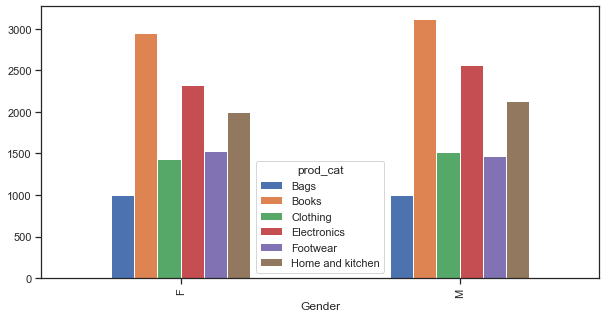

In [21]:
prod_gender.plot(kind='bar',figsize=(10,5))

In [22]:
prod_gender

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,994,2949,1439,2328,1529,1994
M,1004,3116,1518,2570,1469,2134


**Products that are popular among males are:**

- Books
- Clothing
- Electronics
- Home and kitchen



**Products that are popular among females are:**

- Bags
- Footwear

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [23]:
city_cust = Customer_Final.groupby(['city_code'])['customer_Id'].count().sort_values(ascending=False)

Text(0, 0.5, 'No. of customers')

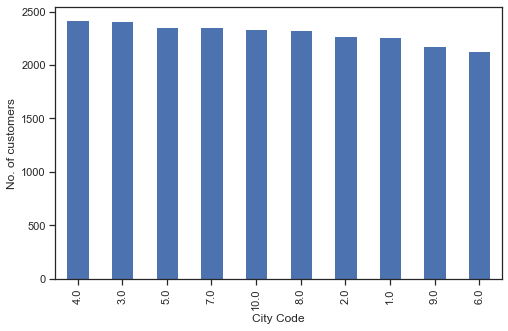

In [24]:
city_cust.plot(kind='bar',figsize=(8,5))
plt.xlabel("City Code")
plt.ylabel("No. of customers")

In [25]:
percent = round((city_cust[4.0] / city_cust.sum())*100,2)

In [26]:
print("City code 4.0 has the maximum customers and the percentage of customers from that city is ",percent)

City code 4.0 has the maximum customers and the percentage of customers from that city is  10.51


### 7. Which store type sells the maximum products by value and by quantity?


In [27]:
Customer_Final.groupby(['Store_type'])[['Qty','Rate']].sum().sort_values(by='Qty',ascending=False)

,Qty,Rate
Store_type,,
e-Shop,22763,5941001
MBR,11194,2953253
Flagship store,11133,2941557
TeleShop,10984,2834420


In [28]:
print('e-Shop store sell the maximum products by value and by quantity')

e-Shop store sell the maximum products by value and by quantity


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [29]:
store_group = round(Customer_Final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum'),2)

In [30]:
store_group

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.83,848678.68,789181.06,1616300.08
Books,2488205.85,2496039.20,2545005.06,5293443.93
Clothing,1194423.23,1287686.34,1241834.36,2527193.57
Electronics,2215136.04,2107514.56,1973338.83,4426474.20
Footwear,1234806.56,1112163.72,1235719.29,2637084.71
Home and kitchen,1712567.68,1822403.57,1579702.48,3324319.57


In [31]:
store_group.loc[["Clothing","Electronics"],["Flagship store"]]

Store_type,Flagship store
prod_cat,
Clothing,1194423.23
Electronics,2215136.04


### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [32]:
Customer_Final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction


In [33]:
gender_group = Customer_Final.pivot_table(index='prod_cat',columns='Gender',values='total_amt',aggfunc='sum')

In [34]:
gender_group

Gender,F,M
prod_cat,,
Bags,2077985.650,2046722.990
Books,6164692.235,6645972.775
Clothing,3026750.805,3224079.495
Electronics,5019354.210,5703109.425
Footwear,3202552.990,3014672.050
Home and kitchen,4132177.335,4301075.480


In [35]:
gender_group.loc[['Electronics'],['M']]

Gender,M
prod_cat,
Electronics,5703109.425


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [36]:
pos_trans = Customer_Final.loc[(Customer_Final.total_amt > 0),:]

In [37]:
unique_tran = pos_trans.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()

In [38]:
unique_count = unique_tran.groupby(['customer_Id'])['transaction_id'].count().reset_index()

In [39]:
unique_count.loc[(unique_count.transaction_id > 10),:].sum()

customer_Id       0
transaction_id    0
dtype: int64

In [40]:
print('There are no unique transactions greater than 10')

There are no unique transactions greater than 10


### 11. For all customers aged between 25 - 35, find out:

**a. What was the total amount spent for “Electronics” and “Books” product categories?**

In [41]:
pd.Timestamp('now')

Timestamp('2021-04-29 15:42:39.565655')

In [42]:
# Adding new column 'age'

now = pd.Timestamp('now')
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'], format='%m%d%y')    
Customer_Final['DOB'] = Customer_Final['DOB'].where(Customer_Final['DOB'] < now, Customer_Final['DOB'] -  np.timedelta64(100, 'Y'))
Customer_Final['age'] = (now - Customer_Final['DOB']).astype('<m8[Y]')

In [43]:
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,age
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,51.0
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,51.0
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,51.0
3,270829,1970-01-22,F,8.0,87174343938,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction,51.0
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction,51.0


In [44]:
# as we have to deal with customers aged between 25-35, so creating new column 'Age_cat

Customer_Final['Age_cat'] = pd.cut(Customer_Final['age'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

In [45]:
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,age,Age_cat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,51.0,47-57
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,51.0,47-57
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,51.0,47-57
3,270829,1970-01-22,F,8.0,87174343938,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction,51.0,47-57
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction,51.0,47-57


In [46]:
# grouping the dataframe 'customer_final' on the basis of 'Age_cat' and 'prod_cat'

customer_25_35 = Customer_Final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()

In [47]:
print("Total amount spent on 'Electronics' and 'Books' product categories is", 
customer_25_35.loc[['25-35'],['Books','Electronics']].sum().round(2))

Total amount spent on 'Electronics' and 'Books' product categories is 7823708.29


**b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?**

In [48]:
total_amount_25_35 = Customer_Final[Customer_Final['Age_cat']=='25-35']

In [49]:
total_amount = total_amount_25_35[(total_amount_25_35['tran_date'] >='2014-01-01') & (total_amount_25_35['tran_date'] <='2014-03-01')]

In [50]:
print('The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is',total_amount['total_amt'].sum().round(2))

The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is 540370.42
